# Introduction to Visualization of Lab Data
There is a variety of Python libraries to visualise data. In this document the well-known library *matplotlib* (https://matplotlib.org/) is used to create simple graphs of measured data.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example: Investigating uniform motion
A low-friction cart slides down a slightly inclined track. Its position is measured at regular time intervals. We assume errors of 0.05 s for the time and 0.1 cm for the position measurements.

#### Define arrays for measured data

In [2]:
time = np.array([0.00, 0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50]) # time in s
pos = np.array([12.3, 15.2, 24.3, 39.4, 60.5, 87.1, 120.3, 159.2]) # position in cm

dt = 0.05 # error for time in s
dx = 0.2 # error for position in cm

#### Visualise data with a scatter plot

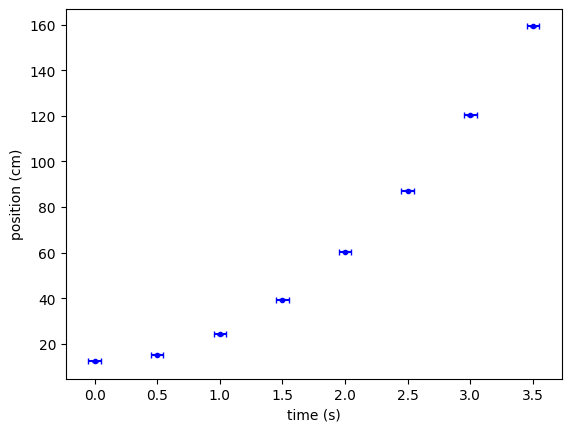

In [3]:
plt.errorbar(time, pos, fmt='.', color='blue', xerr=dt, yerr=dx, capsize=2)
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.show()

The error bars are so small that they can barely be seen. In order to visually confirm the quality of a fit function later on, we will have to find a solution to this problem.

#### Fit a model to the data
For a quantitative analysis we usually want to compare the measured data to a theoretical model. This can be done by *fitting* a function to the data. The fit parameters are related to physical parameters.

In [4]:
from scipy.optimize import curve_fit

We expect the motion to have a constant acceleration, i.e. the position should be a quadratic function of time.

In [6]:
def f(t, a, v0, x0):
    """
    Fit function for a motion with constant acceleration.

    The parameters are:
    t    time
    a    acceleration
    v0   initial velocity
    x0   initial position
    The function returns the position at time t.
    """
    return a/2 * t**2 + v0 * t + x0

In [7]:
# The method curve_fit returns two lists:
# coeff contains the fit parameters
# pcov contains the covariance matrix, whose diagonal elements are a measure
# of how accurately the fit parameters match the data (see below)
coeff, pcov = curve_fit(f, time, pos)
a, v0, x0 = coeff # fit parameters are in the order of the function definition

#### Visualise data and model

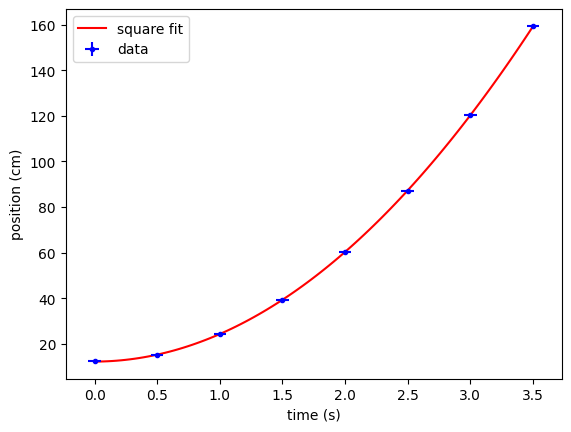

In [8]:
t = np.linspace(0, max(time), 100) # array with evenly spaced t values
x = f(t, a, v0, x0) # array with positions predicted by fit function

plt.plot(t, x, color='red', label='square fit')
plt.errorbar(time, pos, fmt='.', color='blue', xerr=dt, yerr=dx, label='data')
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.legend()
plt.show()

#### Residual plot

The model seems to describe the measured data quite accurately. To see even better if the fit function passes through the error ranges of the data points, we can create a _residual plot_, i.e. a plot of the deviation between the data points and the fit function.

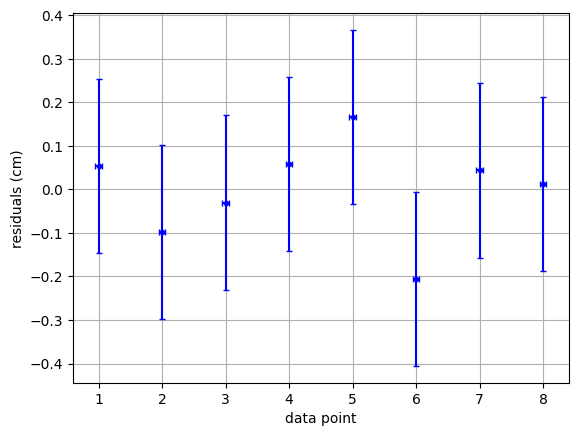

In [9]:
res = pos - f(time, a, v0, x0) # calculate residuals (measured - predicted)

plt.errorbar(range(1, len(time)+1), res, fmt='.', color='blue', xerr=dt, yerr=dx, capsize=2)
plt.xlabel('data point')
plt.ylabel('residuals (cm)')
plt.grid()
plt.show()

The horizontal axis is within the error ranges for all but one data point (no. 6). This is quite convincing evidence that the theoretical model is a good description for the measured data.

#### Errors of fit parameters
The curve_fit method returns the _covariance matrix_ as a second return value. The diagonal elements are the squared errors for the fit parameters.

In [10]:
sq_errors = np.diag(pcov) # assign diagonal elements of covariance matrix
da, dv0, dx0 = np.sqrt(sq_errors) # square root corresponds to errors of fit parameters

print(f'acceleration:      a = ({a:.2f} ± {da:.2f}) cm/s^2')
print(f'initial velocity:  v_0 = ({v0:.2f} ± {dv0:.2f}) cm/s')
print(f'initial position:  x_0 = ({x0:.2f} ± {dx0:.2f}) cm')

acceleration:      a = (23.92 ± 0.08) cm/s^2
initial velocity:  v_0 = (0.12 ± 0.15) cm/s
initial position:  x_0 = (12.25 ± 0.11) cm
